In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from sklearn import tree
import os
import sys

# Tratamento de dados

1 - Primeiro tratamos os dados no excel.

Criando uma coluna nova para definirmos uma casa como cara ou barata de acordo com o preço médio da área construida.
Aquilo que fosse acima da média era considerado caro e o que fosse abaixo da média era considerado barato.

Removemos então as colunas preço, área construida,  id, data e zipcode

Removemos tambem waterfront, já que todos os dados tinham valor 0.

Fizemos então a correlação entre os dados das colunas restantes com a coluna Caro (1 - sim, 0 - não)

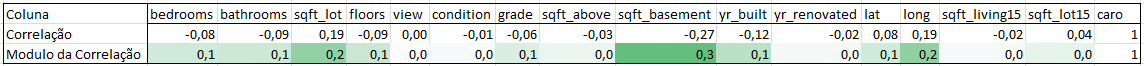

As colunas view, condition, sqft_above, sqfl_living_15 e sqf_loft15 que tem modulo da correlação aproximado em 0 na primeira casa decimal foram então substituidas por colunas binárias de mesmo nome.

View: 0 - não tem vista, 1 - tem vista

Condition: 0 - abaixo da média, 1 - acima da média

sqft_above: 0 - abaixo da média, 1 - acima da média

sqfl_living_15: 0 - abaixo da média, 1 - acima da média

sqf_loft15: 0 - abaixo da média, 1 - acima da média

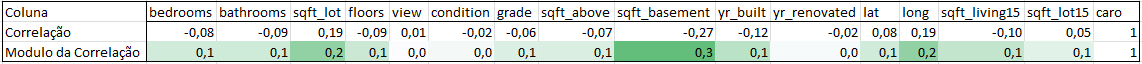

Os dados que ainda estavam com modulo da correlação zerado foram removidos.

Para as Colunas restantes fizemos a seguinte alteração:

yr_built: truncamos o valor na decada (exmplo 1902 passa a ser 1900)

Isso na verdade diminuiu a correlação entre o ano de construção e se a casa era cara ou barata então retornamos essa coluna ao valor anterior.

O yr_renovated alteramos a coluna para uma coluna binária com 1 - se a casa foi renovada e 0 se a casa não foi reonovada.

Como o valor de correlação não foi alterado e a mesma era baixa removemos também essa coluna.


2 - Recalculamos a arvore de decisão



In [ ]:
train = pd.read_csv('base_versao_1.csv', delimiter=';')    
y_train = train['caro']
x_train = train.drop(['caro'], axis=1).values 
decision_tree = tree.DecisionTreeClassifier(max_depth = 20)
decision_tree.fit(x_train, y_train)

with open("Arvore1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(train.drop(['caro'], axis=1)),
                              class_names = ['False', 'True'],
                              rounded = True,
                              filled= True )

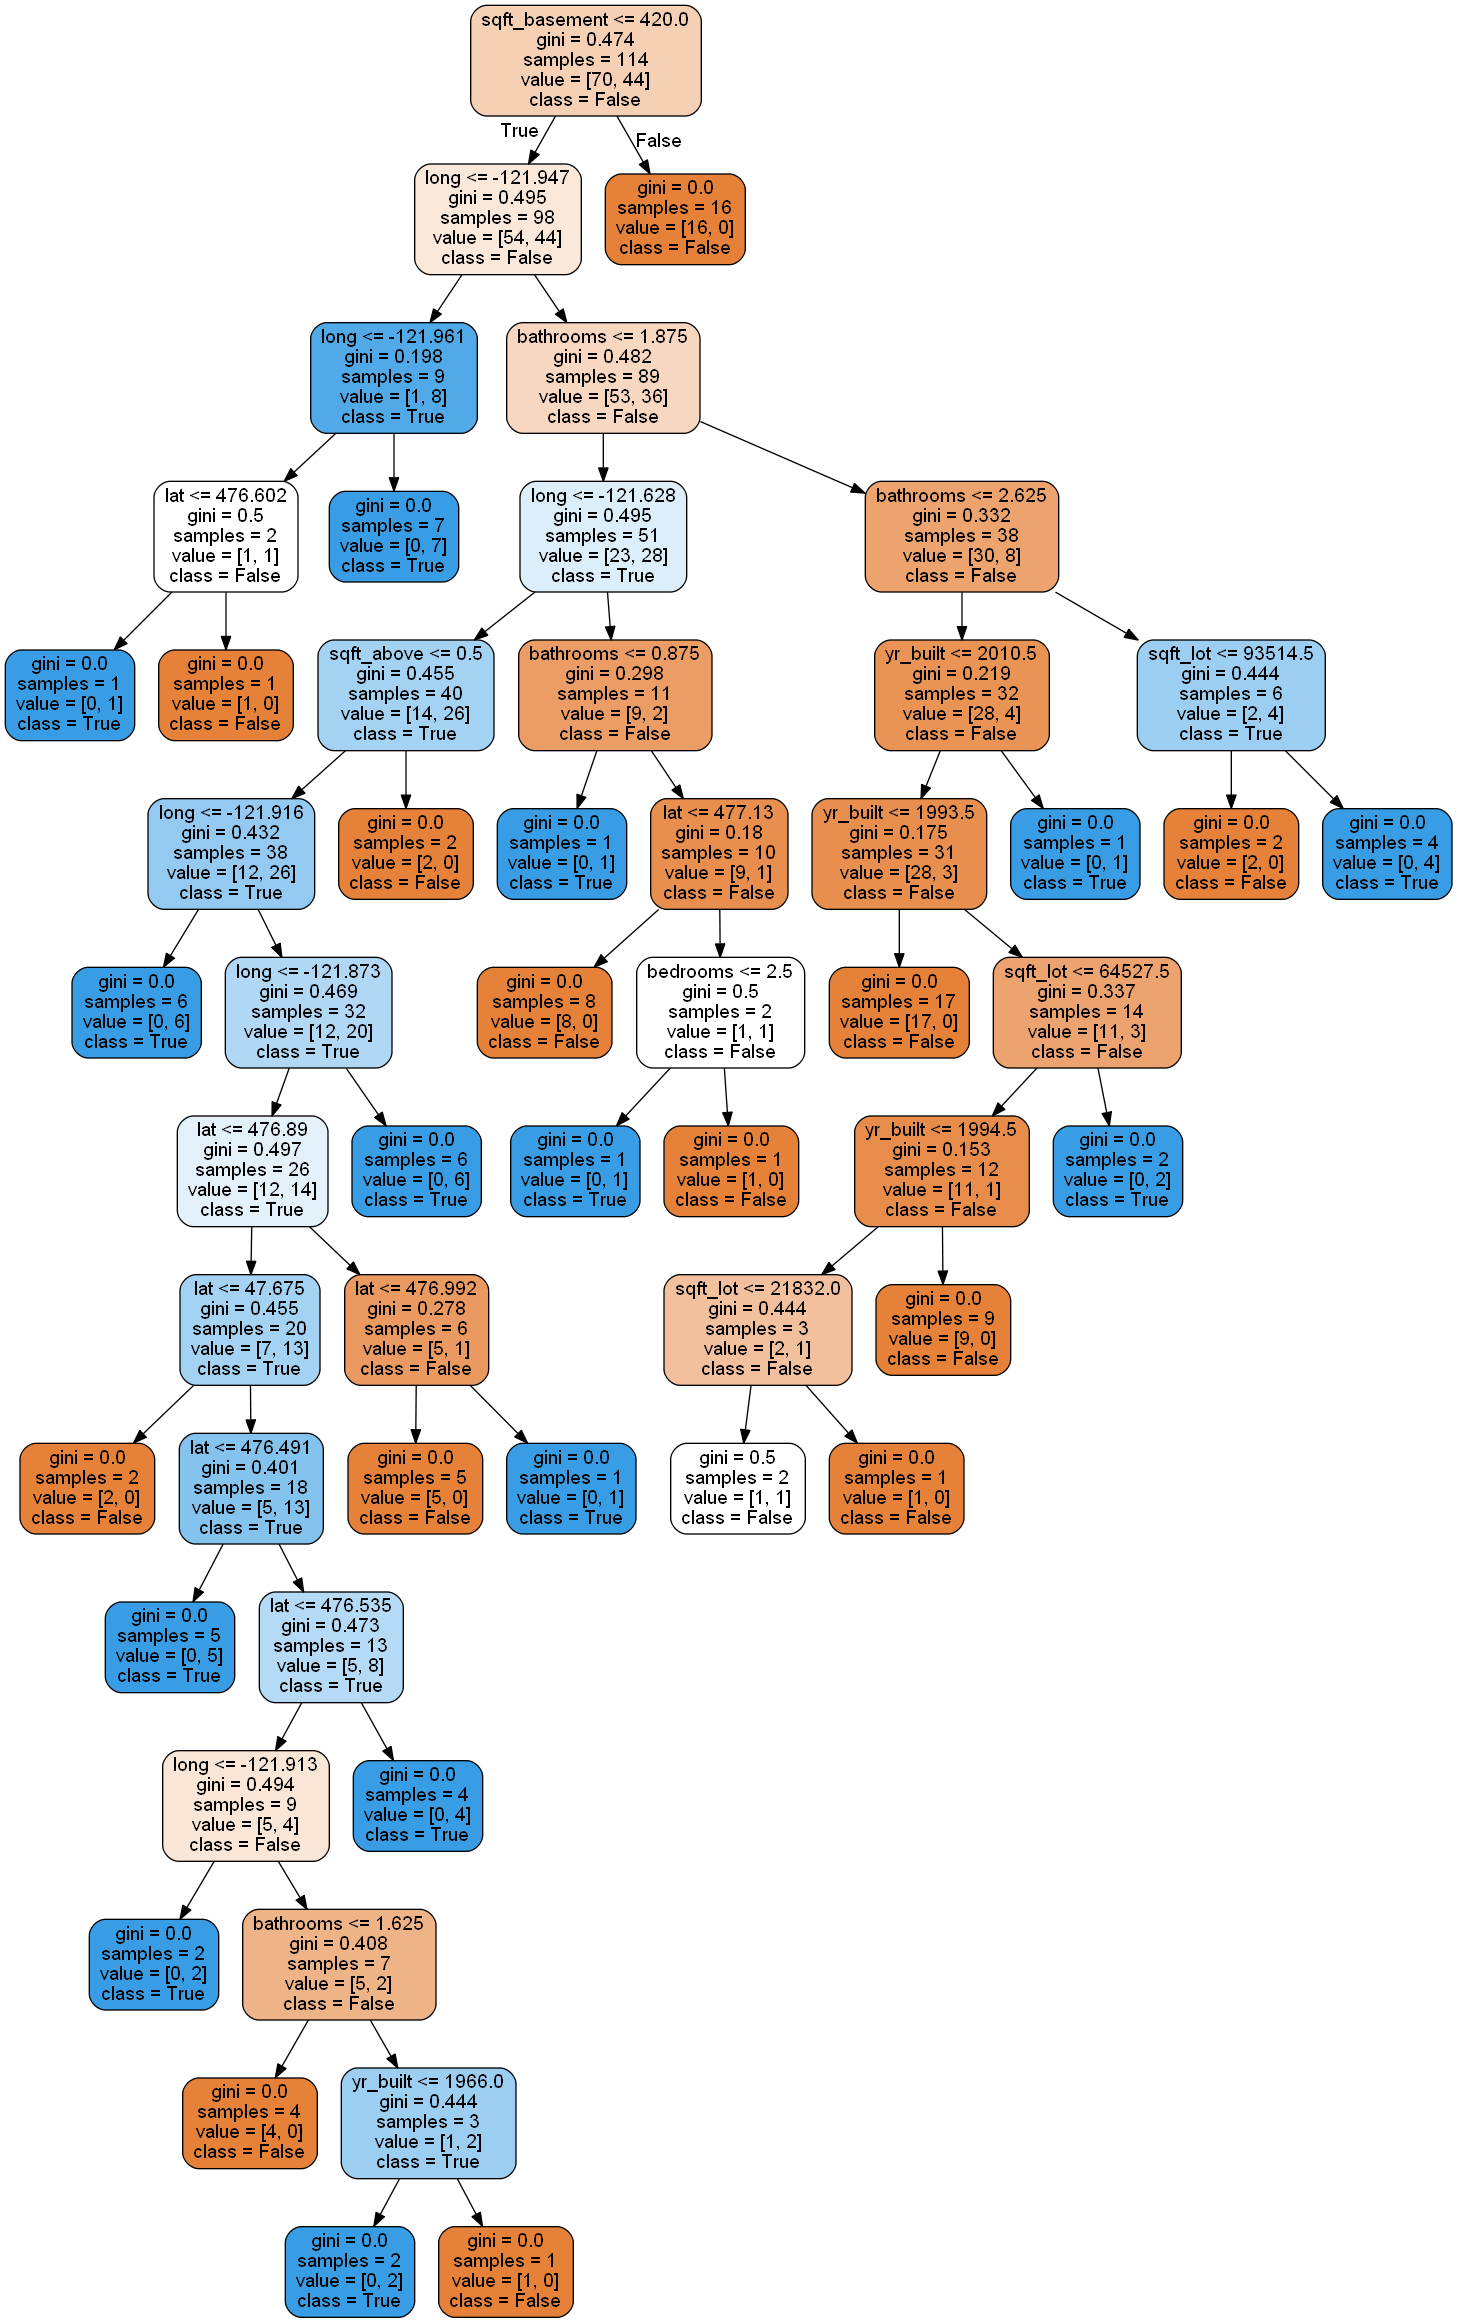

Consideramos a arvore ainda muito grande e com parte muito específicar.

Removemos as colunas lat e long por considerarmos um falso positivo, identificando o endereço de cada casa.
Apesar de sabermos qual casa ser ajudar a saber o valor da casa, com o pasar do tempo alterações no prédio poderiam ser desconsideradas com esses parametros.

Ficamos com as seguintes correlações:

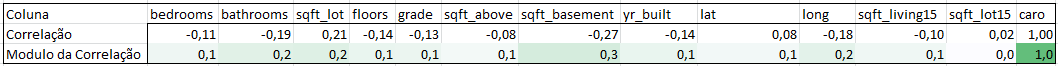

Removemos então também essas colunas e a coluna sqft_lot_15 que tem correlação 0 (em arredondamento).



Removemos também as ultimas 10 linhas da nossa base concluindo com uma base com essas correlações com o campo 'caro':

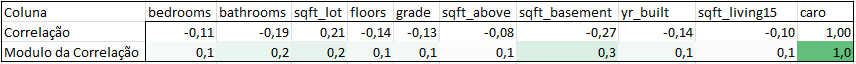

Recalculando a Arvore de decisão obtvemos:

In [ ]:
train = pd.read_csv('base_versao_5.csv', delimiter=';')    
y_train = train['caro']
x_train = train.drop(['caro'], axis=1).values 
decision_tree = tree.DecisionTreeClassifier(max_depth = 20)
decision_tree.fit(x_train, y_train)

with open("Arvore2.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(train.drop(['caro'], axis=1)),
                              class_names = ['False', 'True'],
                              rounded = True,
                              filled= True )

Nosso resultado foi uma arvore com profundidade 10:

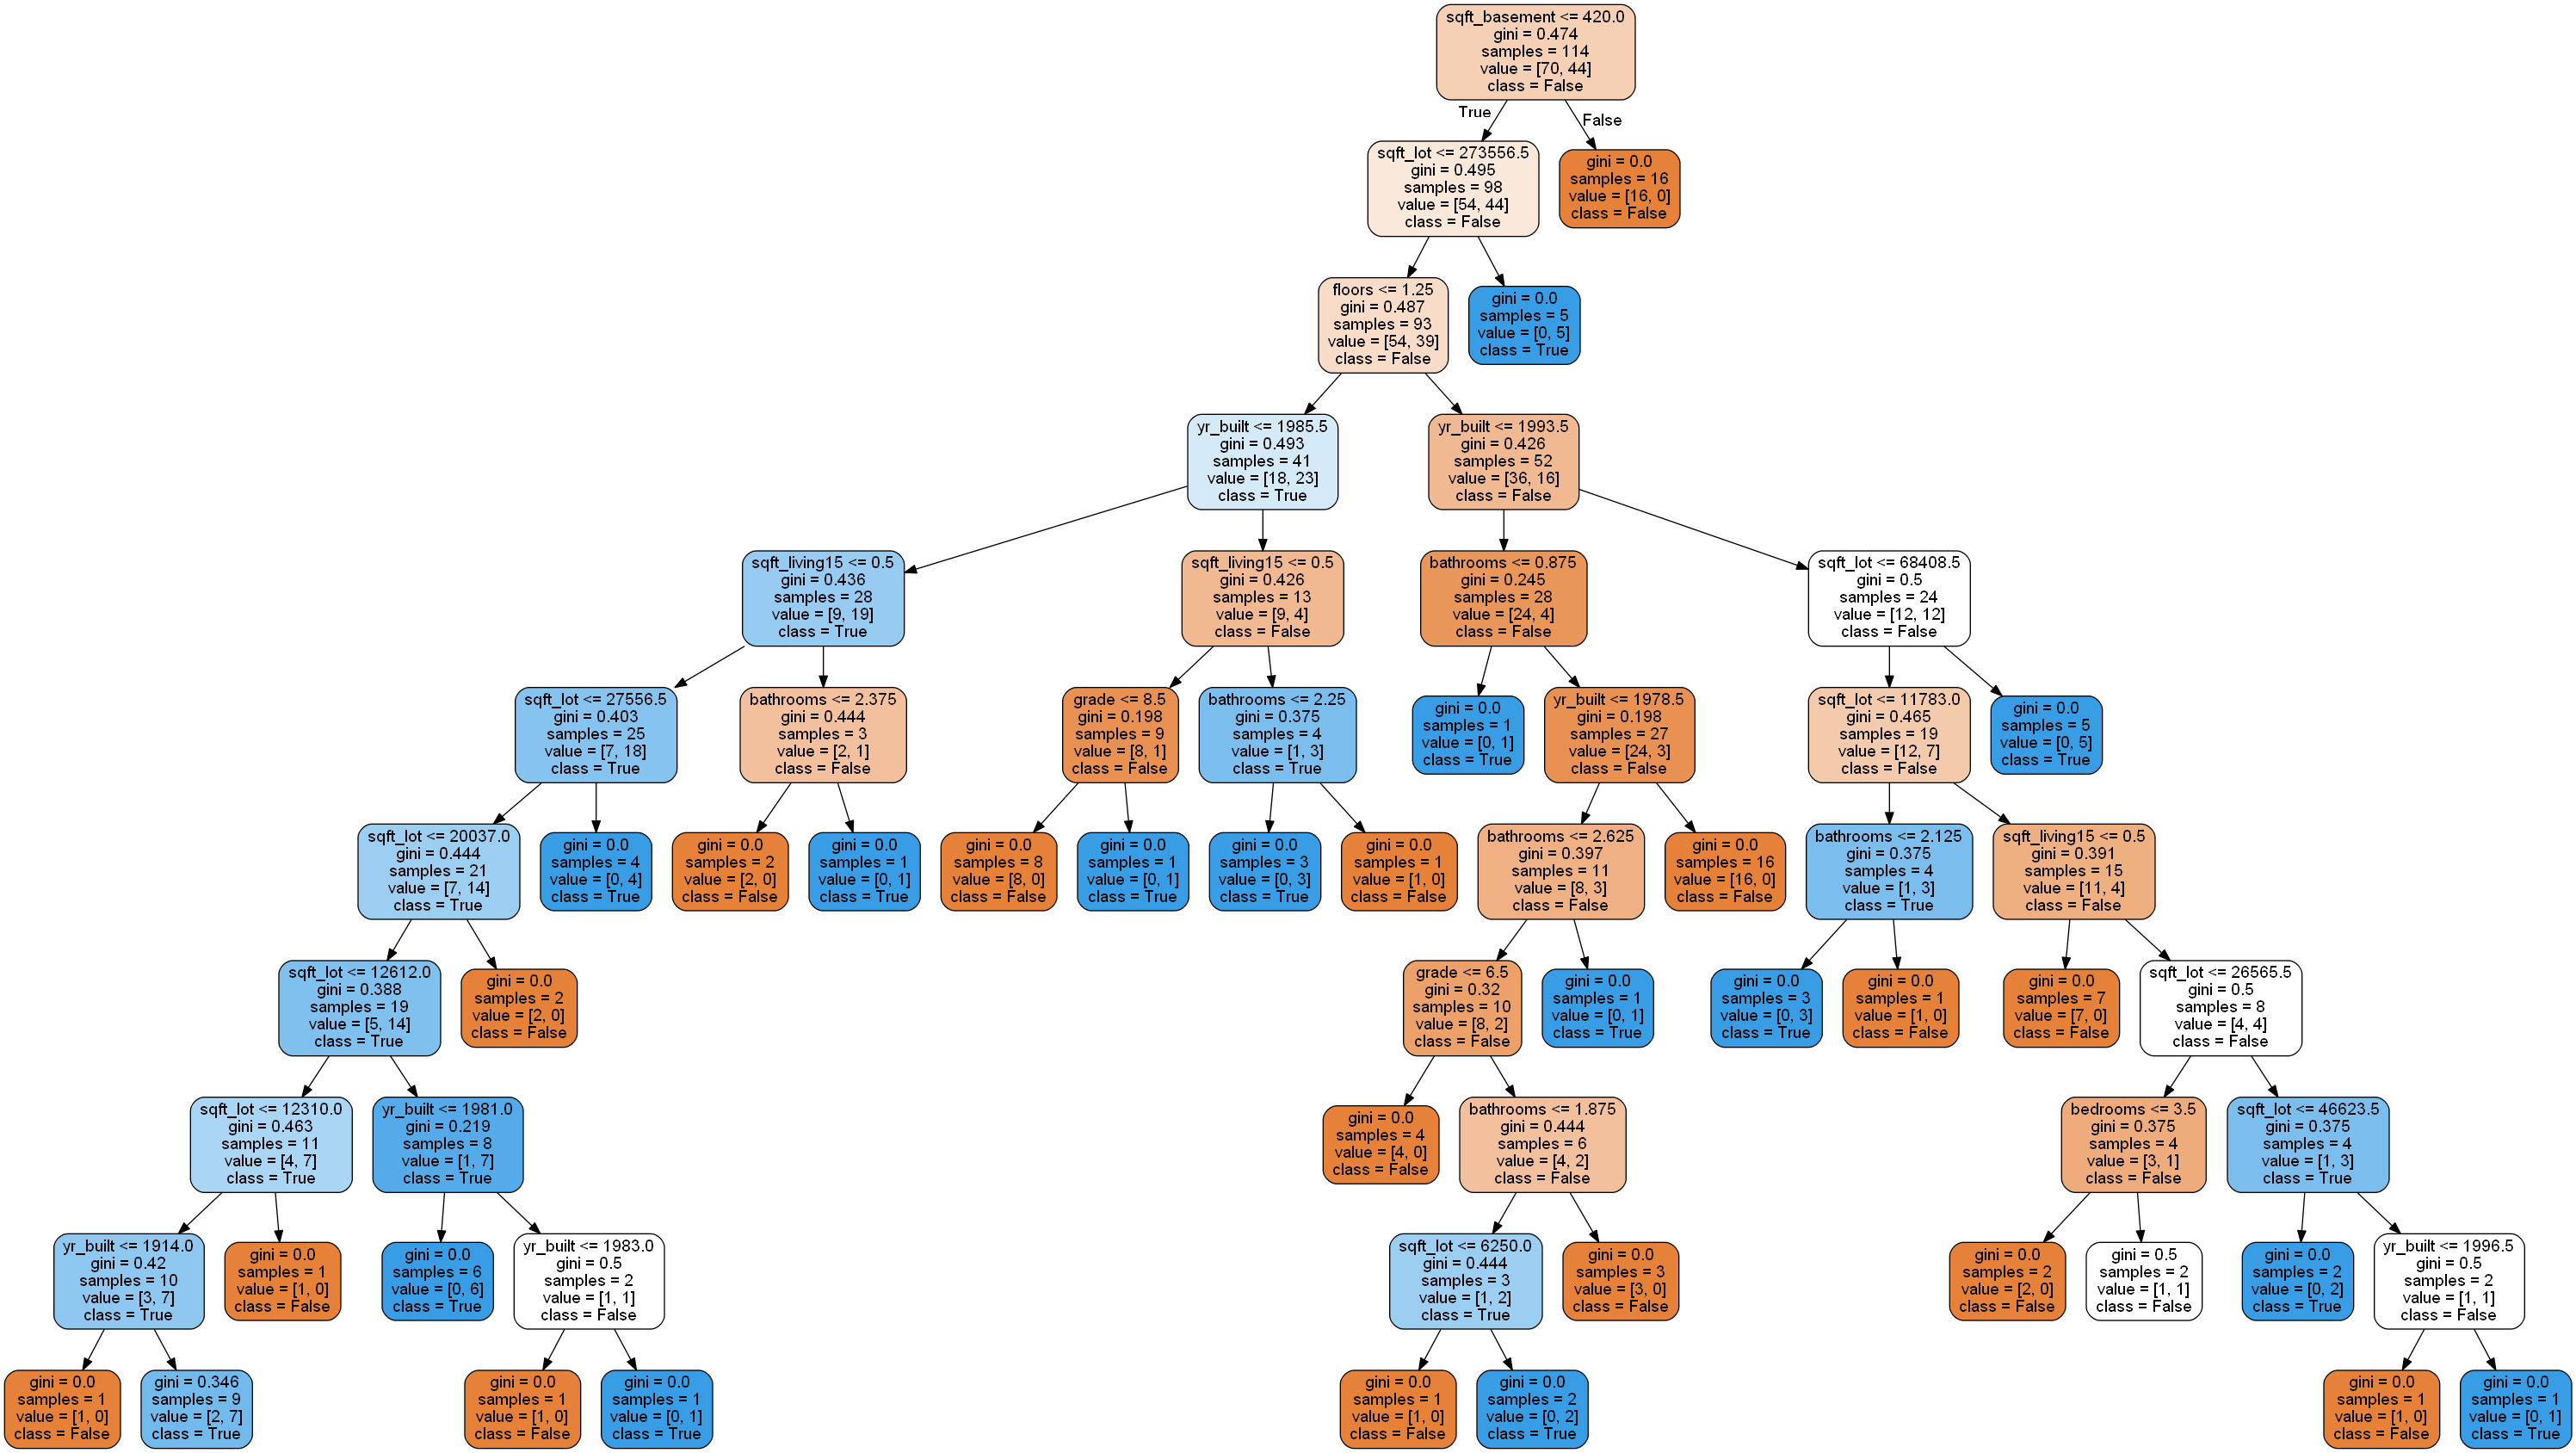

Acreditamos que essa arvore tenha um bom tamanho para o funcionamento do chatbot.

Fizemos mais uma limpeza de dados com base no:
colocar foto aqui

In [ ]:
train = pd.read_csv('base_versao_6.csv', delimiter=';')    
y_train = train['caro']
x_train = train.drop(['caro'], axis=1).values 
decision_tree = tree.DecisionTreeClassifier(max_depth = 20)
decision_tree.fit(x_train, y_train)

with open("Arvore3.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(train.drop(['caro'], axis=1)),
                              class_names = ['False', 'True'],
                              rounded = True,
                              filled= True )

In [ ]:
train = pd.read_csv('base_versao_6.csv', delimiter=';')    
y_train = train['caro']
x_train = train.drop(['caro'], axis=1).values 
decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(x_train, y_train)

with open("Arvore4.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 5,
                              impurity = True,
                              feature_names = list(train.drop(['caro'], axis=1)),
                              class_names = ['False', 'True'],
                              rounded = True,
                              filled= True )

# Chatbot

In [2]:
#Chamamos as novas
class Tree():
    def __init__(self):
        pass

    def ask_question(self):
        return self.question
        
    def caracteristica(self):
        return self.caracteristica

    def valor(self):
        return self.valor

    def check_answer(self,answer):
        if answer == self.answerTrue:
            return self.leftNode
        elif answer == self.answerFalse:
            return self.rightNode
        else:
            return False
        

def rec_build_tree(linha):
    row = texto.loc[linha]
    if row["Pergunta"] == "NÓ FOLHA":
        return row["A"]
    node = Tree() 
    node.leftNode = rec_build_tree(int(row["Nó A"]))    
    node.rightNode = rec_build_tree(int(row["Nó B"]))
    node.question = row["Pergunta"]
    node.caracteristica = row["Caracteristica"]
    node.valor = row["Valor"]
    node.answerTrue = row["A"]
    node.answerFalse = row["B"]
    return node

def is_obj(obj):
    return False if type(obj).__name__ == "str" else True

def mostraMenu():
    print("\nEscolha uma das opções abaixo:"+"\n0 para sair"+"\n1 para "+opcoes[1]+"\n2 para "+opcoes[2]+"\n")
    response = input(arvore.ask_question())
    return response
    

        
texto = pd.read_csv("ArvoreDeDecisaoFinal.csv",sep=';', encoding = 'iso-8859-1',index_col="ID")

In [19]:
counter_tickets = 0

print("-------------------------------------")
print("\nEsse programa tenta descobrir se a casa que você está pensando em comprar é cara ou barata.")
print("Você pode encerrar o programa a qualquer momento digitanto um texto nas caixas.")
print("-------------------------------------\n\n")

while True:
    arvore = rec_build_tree(1)
    count_erros=0
    infoCasa = [['bedrooms','bathrooms','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','sqft_living15'],[-1,-1,-1,-1,-1,-1,-1,-1,-1]]
    print("Vamos começar a verificar essa casa.\nVamos te fazer algumas perguntas")
    while True:
        if count_erros == 2:
            print("ERROS SUCESSIVOS\nVERIFIQUE AS OPÇÕES ANTES DE TENTAR NOVAMENTE\n")
            print("\nMuitas informações! :/ \nPor favor me reinicie.")
            break
        opcoes = {1:arvore.answerTrue,2:arvore.answerFalse}
        #print("\nEscolha uma das opções abaixo:"+"\n0 para sair"+"\n1 para "+opcoes[1]+"\n2 para "+opcoes[2]+"\n")
        #response = input(arvore.ask_question())
        objeto = arvore.caracteristica
        indice = int((infoCasa[0]).index(objeto))
        if infoCasa[1][indice] == -1:
                dado = (input("Digite o valor do "+objeto+": "))
        if dado.isnumeric() :
            infoCasa[1][indice] = float(dado)
            if infoCasa[1][indice] <= arvore.valor:
                response = '1'
            elif infoCasa[1][indice] > arvore.valor:
                response = '2'
        else:
            response = 'noop'
            
            
        while not response.isnumeric():
            if count_erros == 2:
                print("\nMuitas informações! :/ \nPor favor me reinicie.")
                sys.exit()
            print("\nVOcê gostaria de encerrar o programa? :)\nSe quiser é só digitar qualquer texto.\nSe não é só colocar o valor")
            #print("Escolha uma das opções abaixo:"+"\n0 para sair"+"\n1 para "+opcoes[1]+"\n2 para "+opcoes[2])
            #response = input(arvore.ask_question())
            objeto = arvore.caracteristica
            indice = int((infoCasa[0]).index(objeto))
            if infoCasa[1][indice] == -1:
                dado = (input("Digite o valor do "+objeto+": "))
            if dado.isnumeric() :
                infoCasa[1][indice] = float(dado)
                if infoCasa[1][indice] <= arvore.valor:
                    response = '1'
                elif infoCasa[1][indice] > arvore.valor:
                    response = '2'
            else:
                response = 'noop'
                sys.exit()

            count_erros+=1
            
        if int(response) == 0:
            print("\nFim.\n")
            sys.exit()
            
        question = opcoes[int(response)]
        answer = arvore.check_answer(question)
        if answer == False:
            print("\nMe desculpe, não conheço essa opção, vamos tentar novamente? :)")
            count_erros+=1
        elif not is_obj(answer):
            break
        else:
            arvore = answer 
    
    print("-------------------------------------")
    print(answer)
    print("-------------------------------------")
    
    print("Você quer testar outra casa?\nDigite 1 para SIM\nDigite qualquer outra tecla para não")
    resp = input()
    if resp != '1':
        break

-------------------------------------

Esse programa tenta descobrir se a casa que você está pensando em comprar é cara ou barata.
Você pode encerrar o programa a qualquer momento digitanto um texto nas caixas.
-------------------------------------


Vamos começar a verificar essa casa.
Vamos te fazer algumas perguntas
Digite o valor do sqft_basement: s

VOcê gostaria de encerrar o programa? :)
Se quiser é só digitar qualquer texto.
Se não é só colocar o valor
Digite o valor do sqft_basement: 1
Digite o valor do sqft_lot: 2
Digite o valor do floors: 3
Digite o valor do yr_built: 4
Digite o valor do bathrooms: 5
-------------------------------------
O imóvel está acima da média
-------------------------------------
Você quer testar outra casa?
Digite 1 para SIM
Digite qualquer outra tecla para não
1
Vamos começar a verificar essa casa.
Vamos te fazer algumas perguntas
Digite o valor do sqft_basement: s

VOcê gostaria de encerrar o programa? :)
Se quiser é só digitar qualquer texto.
Se n

SystemExit: 